<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/E0322052_Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow
!pip install keras

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.6837 - loss: 0.8610 - val_accuracy: 0.8537 - val_loss: 0.3964
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8521 - loss: 0.4056 - val_accuracy: 0.8780 - val_loss: 0.3356
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8789 - loss: 0.3400 - val_accuracy: 0.8835 - val_loss: 0.3264
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8870 - loss: 0.3099 - val_accuracy: 0.8965 - val_loss: 0.2909
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9001 - loss: 0.2782 - val_accuracy: 0.8979 - val_loss: 0.2884
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9061 - loss: 0.2544 - val_accuracy: 0.9036 - val_loss: 0.2785
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9116 - loss: 0.2438 - val_accuracy: 0.9081 - val_loss: 0.2551
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9166 - loss: 0.2234 - val_accuracy:

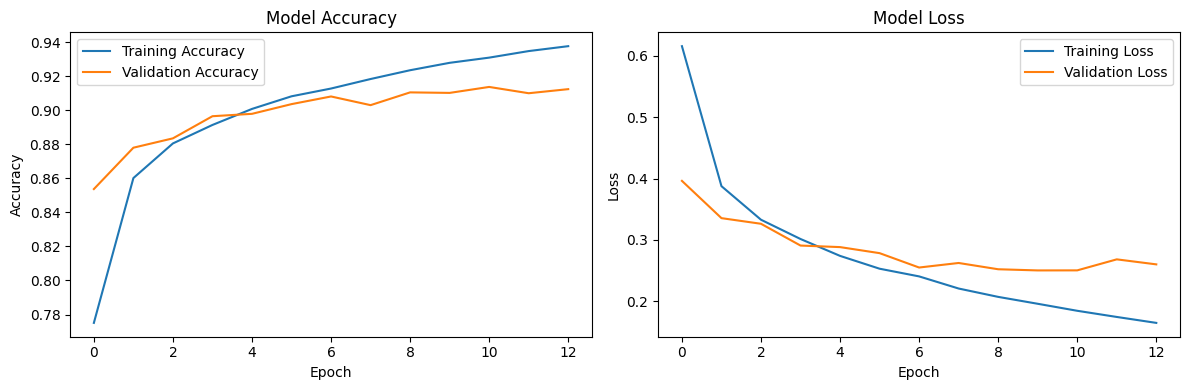

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
Image 1: Predicted: Ankle boot, Actual: Ankle boot
Image 2: Predicted: Pullover, Actual: Pullover
Image 3: Predicted: Trouser, Actual: Trouser
Image 4: Predicted: Trouser, Actual: Trouser
Image 5: Predicted: Shirt, Actual: Shirt


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to include channel dimension (required for CNN)
x_train = x_train.reshape(-1, 28, 28, 1)  # 60,000 training images
x_test = x_test.reshape(-1, 28, 28, 1)    # 10,000 test images

# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. Build the deep learning model (CNN)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(10, activation='softmax')  # 10 output classes
])

# 3. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# 4. Define early stopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',     # Monitor validation loss
    patience=3,             # Stop after 3 epochs with no improvement
    restore_best_weights=True,  # Restore weights from the best epoch
    verbose=1
)

# 5. Train the model with early stopping
history = model.fit(x_train, y_train, epochs=50, batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

# 6. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# 7. Plot training results
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 8. Make predictions on a few test images
predictions = model.predict(x_test[:5])
for i in range(5):
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    print(f"Image {i+1}: Predicted: {class_names[predicted_label]}, Actual: {class_names[true_label]}")